In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [92]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [93]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [94]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [95]:
insurance.loc[outliers_iqr(insurance["bmi"])]

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [96]:
print(insurance['sex'].value_counts().sort_values()) 
print(insurance['smoker'].value_counts().sort_values())
print(insurance['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
northwest    325
southwest    325
southeast    364
Name: region, dtype: int64


In [97]:
clean_insurance= {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
insurance = insurance.copy()
insurance.replace(clean_insurance, inplace=True)

In [98]:
insurance.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.665471,1.094918,0.204783,1.514948,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.105572,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


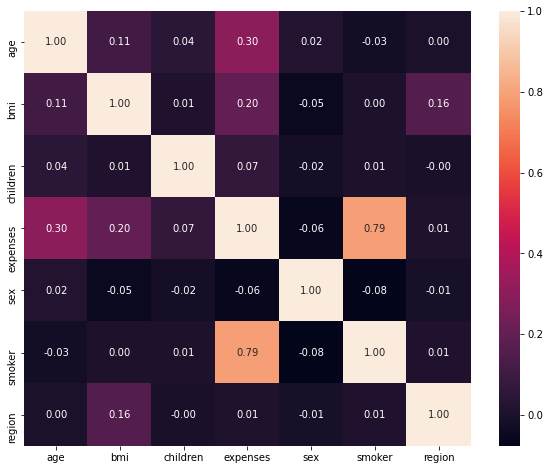

In [99]:
list1 = ["age","bmi","children","expenses","sex","smoker","region"]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(insurance[list1].corr(), annot = True , fmt=".2f")
plt.show()

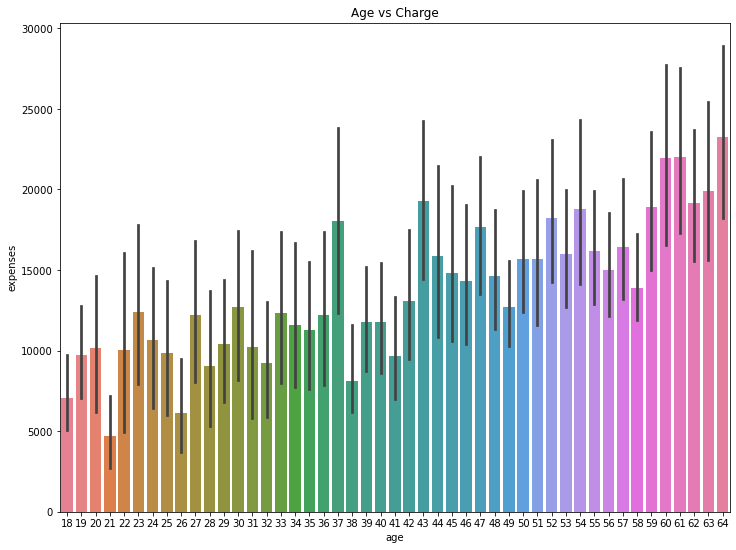

In [103]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='expenses',data=insurance,palette='husl')
plt.show()

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='expenses'>

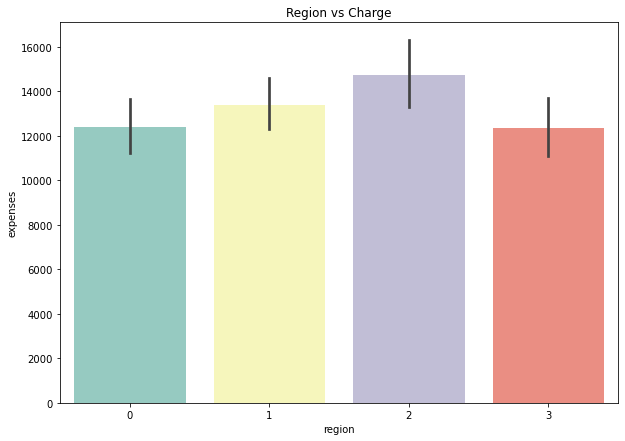

In [105]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='expenses',data=insurance,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

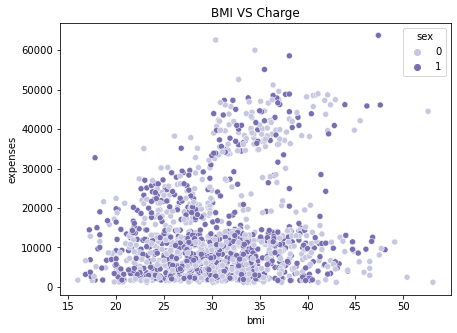

In [111]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='expenses',hue='sex',data=insurance,palette='Purples')
plt.title('BMI VS Charge')

In [85]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=4, random_state=13)

In [53]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [54]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="rbf", C=1000 )  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto')

In [55]:
# Importing evaluation metrics

from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [56]:
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.857987286659203
Testing Accuracy for Decision Tree Regression Model:  0.8802320436057114
RMSE for Training Data:  4512.185281427831
RMSE for Testing Data:  4365.62371992602
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8508236806420276


In [57]:
## Checking accuracy with vanilla Random forests

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8831275238406227
Testing Accuracy for Random Forest Regression Model:  0.8952529450752874
RMSE for Training Data:  4093.355224028489
RMSE for Testing Data:  4082.6945721675384
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8589831370501735


In [58]:
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Support Vector Regression Model:  0.7454688597040091
Testing Accuracy for Support Vector Regression Model:  0.7775422874862461
RMSE for Training Data:  6040.790488928649
RMSE for Testing Data:  5949.763655047545


In [61]:
# Compare all results in one table
training_accuracies = [accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_DTR, accuracy_cv_RFR, "NA"]

parameters = ["max_depth=4", "n_estimators=500, max_depth=4", "kernel=”rbf”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Decision Tree Regression,max_depth=4,0.857987,0.880232,4512.185281,4365.623720,0.850824
Random Forest Regression,"n_estimators=500, max_depth=4",0.883128,0.895253,4093.355224,4082.694572,0.858983
Support Vector Regression,"kernel=”rbf”, C=1000",0.745469,0.777542,6040.790489,5949.763655,NA


In [62]:
## Hyperparameter tuning in Decision trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeRegressor(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeRegressor(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 6472 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 6498 out of 6498 | elapsed:   15.0s finished


Best paramters: {'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

In [63]:
## Checking accuracy with Tuned DTs

# Prediction with training dataset:
y_pred_DTR_train = tree_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = tree_clf.predict(X_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(tree_clf, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

RMSE for Training Data:  4529.0709451457815
RMSE for Testing Data:  4157.192767136226
Training Accuracy for Decision Tree Regression Model:  0.8569224075936374
Testing Accuracy for Decision Tree Regression Model:  0.8913953640004728
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8519152489746703


In [64]:
## Hyperparameter tuning in Random forests

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth} #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=2,n_jobs = -1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestRegressor(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.2min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1500}


RandomForestRegressor(max_depth=4, n_estimators=1500)

In [66]:
## Checking accuracy with Tuned RFs

# Prediction with training dataset:
y_pred_RFR_train = rf_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_clf.predict(X_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)


RMSE for Training Data:  4359.085331064916
RMSE for Testing Data:  4054.0811877567385


In [67]:
## Hyper parameter tuning the SVM

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000,10000,100000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5, iid=True,n_jobs = -1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVR(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  3.9min finished
C:\Users\MY3\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best params: {'C': 100000, 'gamma': 0.01, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.01)

In [68]:
## Checking accuracy with Tuned SVMs

# Prediction with training dataset:
y_pred_SVR_train = svm_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svm_clf.predict(X_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)


RMSE for Training Data:  5050.055703900805
RMSE for Testing Data:  4444.054683484056
